In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test)

(40, 10)

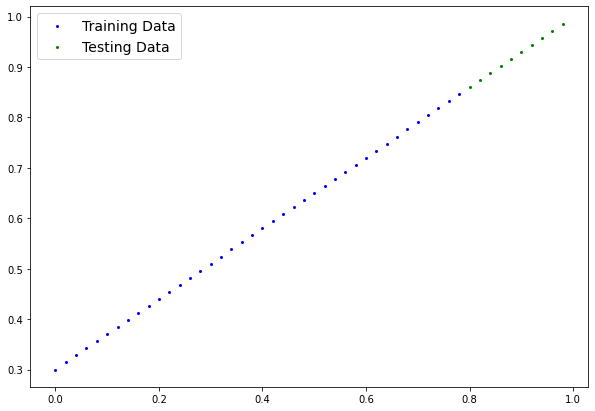

In [4]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):

    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c='b', s=4, label="Training Data")
    plt.scatter(test_data, test_labels, c='g', s=4,label="Testing Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})

plot_predictions()

In [5]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(1,1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [6]:
model_0 = LinearRegressionModel()
model_0
list(model_0.parameters())

[Parameter containing:
 tensor([[0.3464]], requires_grad=True), Parameter containing:
 tensor([-0.4014], requires_grad=True)]

In [7]:
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3464]])),
             ('linear_layer.bias', tensor([-0.4014]))])

In [8]:
with torch.inference_mode():
    y_preds = model_0(X_test)

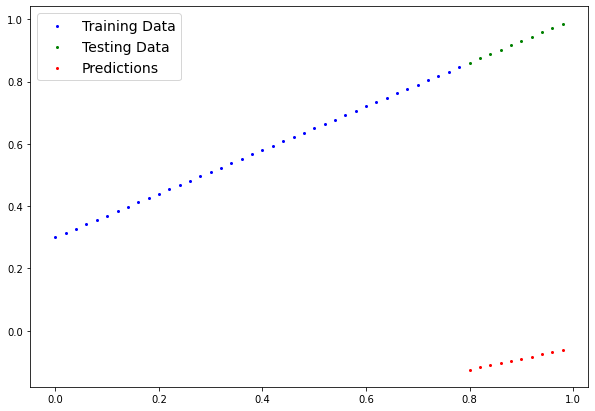

In [9]:
plot_predictions(predictions = y_preds)

In [10]:
y_test-y_preds

tensor([[0.9843],
        [0.9914],
        [0.9984],
        [1.0055],
        [1.0126],
        [1.0196],
        [1.0267],
        [1.0338],
        [1.0409],
        [1.0479]])

In [11]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [12]:
epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

    model_0.train()

    train_pred = model_0(X_train)

    train_loss = loss_fn(train_pred, y_train)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model_0.eval()

    with torch.inference_mode():

        test_pred = model_0(X_test)

        test_loss = loss_fn(test_pred, y_test)

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(train_loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} Train Loss: {train_loss} Test Loss: {test_loss}")

Epoch: 0 Train Loss: 0.839320957660675 Test Loss: 1.0026369094848633
Epoch: 10 Train Loss: 0.7241111397743225 Test Loss: 0.867927074432373
Epoch: 20 Train Loss: 0.6089011430740356 Test Loss: 0.7332171201705933
Epoch: 30 Train Loss: 0.4936911165714264 Test Loss: 0.5985072255134583
Epoch: 40 Train Loss: 0.3784812092781067 Test Loss: 0.46379733085632324
Epoch: 50 Train Loss: 0.2632712423801422 Test Loss: 0.32908737659454346
Epoch: 60 Train Loss: 0.14806123077869415 Test Loss: 0.19437745213508606
Epoch: 70 Train Loss: 0.03285130113363266 Test Loss: 0.05966753885149956
Epoch: 80 Train Loss: 0.01098779309540987 Test Loss: 0.02510119043290615
Epoch: 90 Train Loss: 0.007554636802524328 Test Loss: 0.01682865060865879


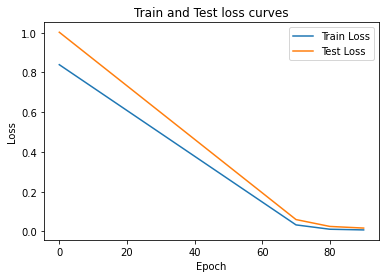

In [13]:
plt.plot(epoch_count, train_loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Train and Test loss curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend();

In [14]:
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6795]])),
             ('linear_layer.bias', tensor([0.3086]))])

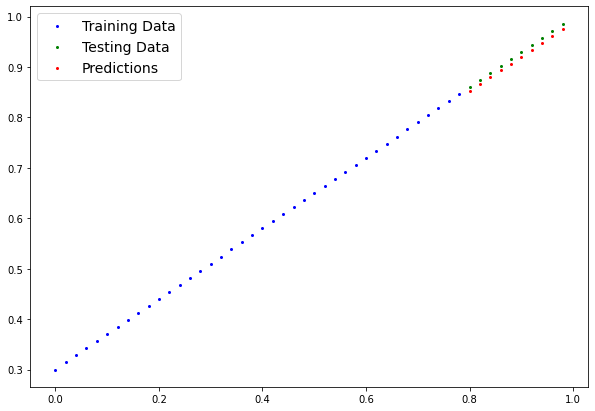

In [15]:
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

In [16]:
torch.save(model_0.state_dict, "model.pth")

In [17]:
loaded_model_0 = LinearRegressionModel()
state_dict = torch.load("model.pth")
loaded_model_0.load_state_dict(state_dict())

<All keys matched successfully>

In [18]:
loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds=loaded_model_0(X_test)

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])